In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [3]:
zoo_df=pd.read_csv("Zoo.csv")

In [4]:
zoo_df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [5]:
zoo_df=zoo_df.rename({'animal name':'animal_name'},axis=1)

In [6]:
zoo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [7]:
#for i in zoo_df.columns:
#    print(len(zoo_df.(zoo_df.columns[i]).value_counts()))
 #    #print(" Unique ",zoo_df.columns[i]," are : ",len(zoo_df.i.value_counts()))

In [8]:
len(zoo_df.catsize.value_counts())

2

In [9]:
# No Null values in the df

In [10]:
'''r i in range(1,len(zoo_df.columns)):
    sns.catplot(x='animal_name',y=zoo_df.columns[i],data=zoo_df,kind="box")
    plt.show()
    '''

'r i in range(1,len(zoo_df.columns)):\n    sns.catplot(x=\'animal_name\',y=zoo_df.columns[i],data=zoo_df,kind="box")\n    plt.show()\n    '

In [11]:
# Data Preprocessing
from sklearn import preprocessing


In [12]:
# converting categorical to numbers
label_encoder=preprocessing.LabelEncoder()
zoo_df['animal_name']=label_encoder.fit_transform(zoo_df['animal_name'])

In [13]:
zoo_df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [14]:
X = zoo_df.iloc[:, 0:-1]
Y = zoo_df.iloc[:, -1]

In [15]:
Y.value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

In [16]:
X

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,95,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,96,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,97,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,98,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [17]:

minMax_scaler = preprocessing.MinMaxScaler()
zoo_norm_x=minMax_scaler.fit_transform(X)

In [18]:
zoo_norm_x

array([[0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.01010101, 1.        , 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.02020202, 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.97979798, 1.        , 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.98989899, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.        , 1.        , ..., 1.        , 0.        ,
        0.        ]])

In [19]:
# Using cross validation 

In [20]:
num_folds = 10
kfold = KFold(n_splits=10)

In [21]:
model = KNeighborsClassifier(n_neighbors=10)
score = cross_val_score(model, zoo_norm_x, Y, cv=kfold)

In [22]:
print(score.mean())

0.9100000000000001


# Grid Search to find the best k value

In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
X_gs=zoo_df.iloc[:,0:-1]
Y_gs=zoo_df.iloc[:,-1]

In [25]:
n_neighbors=np.array([2*i+1 for i in range(0,20)])
param_grid=dict(n_neighbors=n_neighbors)

In [26]:
#param_grid

In [27]:
model=KNeighborsClassifier()
grid=GridSearchCV(estimator=model,
                  param_grid=param_grid,
                  cv=10)

In [28]:
grid.fit(zoo_norm_x,Y_gs)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39])})

In [29]:
print(grid.best_params_)
print(grid.best_score_)

{'n_neighbors': 1}
0.97


In [30]:
# best score is for k=1

# Plot the scores for diff k values

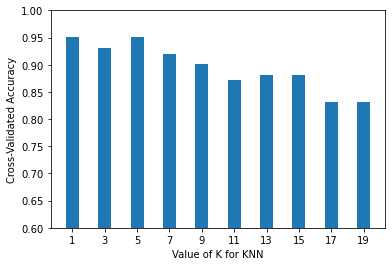

In [31]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 41
k_range = [2*i+1 for i in range(0,10)]
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, zoo_norm_x, Y, cv=4)
    k_scores.append(scores.mean())
# plot to see clearly
plt.bar(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(k_range)
plt.ylim(0.6,1)
plt.show()